In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import collections
import pickle
import gc

In [2]:
# Read all files
json_files=[]
csv_files=[]
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        fname=os.path.join(dirname, filename)
        if fname.endswith('csv'):
            csv_files.append(fname)
        elif fname.endswith('json'):
            json_files.append(fname)
            
            
# Reorder CSV files
country_codes=list(map(lambda string:''.join(list(filter(lambda word:word.isupper(),string))),csv_files))

country_codes, order=zip(*sorted(list(zip(country_codes,range(len(country_codes)))), key=lambda val:val[0]))
csv_files=[csv_files[ind] for ind in order]

# Reorder json files
country_codes=list(map(lambda string:''.join(list(filter(lambda word:word.isupper(),string))),json_files))
country_codes,order=zip(*sorted(list(zip(country_codes,range(len(country_codes)))), key=lambda val:val[0]))
json_files=[json_files[ind] for ind in order]


def initialize_country_dataframe(dataframe,json_fname,country_code):
    '''First, remove duplicate rows from the dataframe, second, map category_id column to actual categories, third,
    new column in the dataframe called country_code'''
    
    df=dataframe.copy()
    df.drop_duplicates(inplace=True)
    
    with open(json_fname,'r') as f:
        json_data=json.loads(f.read())

    mapping_dict=dict([(int(dictionary['id']),dictionary['snippet']['title']) for dictionary in json_data['items']])

    df['category']=df['category_id'].replace(mapping_dict)
    del df['category_id']

    df['country_code']=country_code
    
    return df

# Initialize country-by-country dataframe using above written function
dataframes=[]
for ind,code in enumerate(country_codes):
    try:
        df=pd.read_csv(csv_files[ind])
    except:
        df=pd.read_csv(csv_files[ind],engine='python')
                
    df=initialize_country_dataframe(df,json_files[ind],code)
    print(code,df.shape)
    dataframes.append(df)
    
    
# Concatenate individual dataframe to form single main dataframe
dataframe=pd.concat(dataframes)
print(dataframe.shape)


# Remove videos with unknown video id
drop_index=dataframe[dataframe.video_id.isin(['#NAME?','#VALUE!'])].index
dataframe.drop(drop_index, axis=0, inplace=True)

CA (40881, 17)
DE (40840, 17)
FR (40724, 17)
GB (38745, 17)
IN (33089, 17)
JP (14846, 17)
KR (32251, 17)
MX (40402, 17)
RU (40693, 17)
US (40901, 17)
(363372, 17)


In [3]:
dataframes

[          video_id trending_date  \
 0      n1WpP7iowLc      17.14.11   
 1      0dBIkQ4Mz1M      17.14.11   
 2      5qpjK5DgCt4      17.14.11   
 3      d380meD0W0M      17.14.11   
 4      2Vv-BfVoq4g      17.14.11   
 ...            ...           ...   
 40876  sGolxsMSGfQ      18.14.06   
 40877  8HNuRNi8t70      18.14.06   
 40878  GWlKEM3m2EE      18.14.06   
 40879  lbMKLzQ4cNQ      18.14.06   
 40880  POTgw38-m58      18.14.06   
 
                                                    title     channel_title  \
 0             Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
 1                          PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
 2      Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
 3                               I Dare You: GOING BALD!?          nigahiga   
 4            Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
 ...                                                  ...               ...   
 

In [4]:
dataframes[0].head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country_code
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Entertainment,CA
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,Entertainment,CA
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming,CA
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,News & Politics,CA


In [5]:
dataframes[1].head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country_code
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Entertainment,DE
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Comedy,DE
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,DE
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Education,DE
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Entertainment,DE


In [6]:
dataframes[9].head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country_code
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,US


### Feature creation 

In [10]:
# Create feature num_days that indicates the number of days the videos are in trend
video_ids=dataframe.video_id.unique().tolist()
num_days=[]
id_days={}
for vid in tqdm(video_ids):
    days=len(dataframe[dataframe.video_id==vid].trending_date.unique())
    id_days[vid]=days
    num_days.append(days)
    

# Create feature num_countries that indicates the number of countries in the videos trended
video_ids=dataframe.video_id.unique().tolist()
num_countries=[]
id_countries={}
for vid in tqdm(video_ids):
    days=len(dataframe[dataframe.video_id==vid].country_code.unique())
    id_countries[vid]=days
    num_countries.append(days)

  0%|          | 0/178699 [00:00<?, ?it/s]

  0%|          | 0/178699 [00:00<?, ?it/s]

In [12]:
num_days

[14,
 5,
 7,
 6,
 14,
 1,
 3,
 7,
 3,
 2,
 3,
 1,
 4,
 3,
 2,
 1,
 1,
 1,
 3,
 6,
 5,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 4,
 1,
 2,
 2,
 2,
 1,
 1,
 4,
 2,
 5,
 1,
 5,
 4,
 11,
 1,
 4,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 11,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 7,
 4,
 4,
 7,
 7,
 4,
 4,
 3,
 8,
 1,
 3,
 2,
 1,
 8,
 2,
 2,
 3,
 3,
 4,
 2,
 7,
 1,
 6,
 3,
 2,
 3,
 6,
 3,
 1,
 2,
 4,
 13,
 1,
 2,
 1,
 7,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 5,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 3

In [13]:
num_countries

[5,
 3,
 4,
 4,
 6,
 2,
 2,
 6,
 4,
 2,
 4,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 4,
 3,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 4,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 7,
 5,
 7,
 3,
 5,
 1,
 3,
 2,
 6,
 3,
 1,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 4,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,


In [11]:
# Create feature days_lapse that indicates the number of days before videos are in trend
def unique_video_id(keep='last'):
    '''Removes duplicate videos to keep single record according to trending_date and keep argument.'''
    df=dataframe.copy()
    
    df.sort_values(by=['video_id','trending_date'],axis=0,inplace=True)
    df.drop_duplicates(subset='video_id',keep='last',inplace=True)
    
    return df

df=unique_video_id(keep='first')

def publish_date(string):
    return string.split('T')[0]

df['publish_date']=pd.to_datetime(df.publish_time.apply(func=lambda val:publish_date(val)),format='%Y-%m-%d')
df['trending_date']=pd.to_datetime(df.trending_date,format='%y.%d.%m')
df['days_lapse']=df['trending_date']-df['publish_date']

df.days_lapse=df.days_lapse.apply(func=lambda val:val.days).values
id_days_lapse=dict(zip(df.video_id.values,df.days_lapse.values))

def n_days_lapse_replace(vid):
    return id_days_lapse[vid]

dataframe['days_lapse']=dataframe.video_id.apply(func=n_days_lapse_replace)

# Create feature trend_month that indicates month the videos are in trend
def trend_month(string):
    return int(string.split('.')[2])

dataframe['trend_month']=dataframe.trending_date.apply(func=lambda val:trend_month(val))

# Create feature publish_month that indicates the months that the videos are published in
def publish_month(string):
    return int(string.split('T')[0].split('-')[1])
dataframe['publish_month']=dataframe.publish_time.apply(func=lambda val:publish_month(val))

# Create feature publish_hour that indicates the hours that the videos are published in
def publish_hour(string):
    return int(string.split('T')[1].split(':')[0])

dataframe['publish_hour']=dataframe.publish_time.apply(func=lambda val:publish_hour(val))

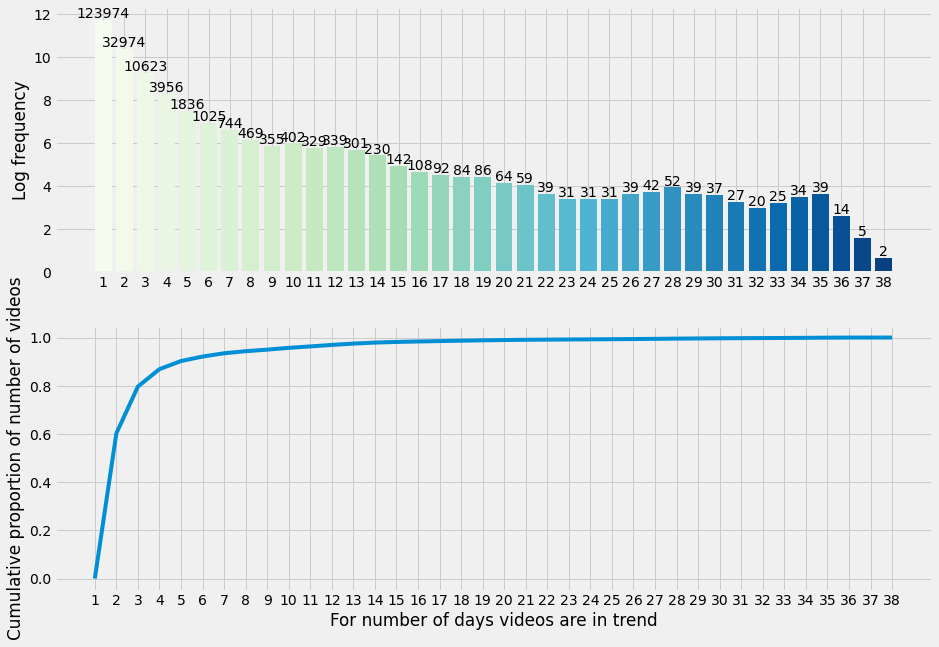

In [14]:


trending_days=collections.Counter(num_days)
days,freq=zip(*sorted(trending_days.items(),key=lambda val:val[0]))

fig,[ax1,ax2]=plt.subplots(nrows=2,ncols=1,figsize=(14,10))

cmap = plt.get_cmap('GnBu') 
colors=[cmap(i) for i in np.linspace(0, 1, len(days))]
ax1.bar(range(len(days)),np.log(freq),color=colors)
ax1.set_xticks(range(len(days)))
ax1.set_xticklabels(days)    

labels=[str(val) for val in freq]
for ind,val in enumerate(np.log(freq)):
    ax1.text(ind,val+0.1,labels[ind],ha='center')

ax1.set_xticks(range(len(days)))
ax1.set_xticklabels(days)

ax1.set_ylabel('Log frequency')

cum_arr=np.cumsum(freq)
max_val=np.max(cum_arr)
min_val=np.min(cum_arr)

ax2.plot((cum_arr-min_val)/(max_val-min_val))
ax2.set_xticks(range(len(days)))
ax2.set_xticklabels(days)
ax2.set_ylabel('Cumulative proportion of number of videos')
ax2.set_xlabel('For number of days videos are in trend');